# Evolution of Opioid Overdose Death in the US
### By Michelle Ju Young Rhee | Date Modified: 3/13/2023


### Research Question: ***How has the opioid overdose deaths in the U.S. progressed from 1999 to 2019 by sex and race?***

## I. Introduction
<br> For my final project, I decided to analyze the evolution of the opioid overdose in the United States from 1999 to 2019 and delve deeper into comparing the drug overdose of varying races and sex. I felt motivated to use this opioid data file after watching a documentary about opioid overdose death and how it has rapidly grown over the past decade across the United States. I became interested in analyzing how opioid overdose has impacted varying races and sex and comparing the growth rate of each group. 

## II. Methods
<br> The data that I am using for this project was retrieved from CORGIS Opioids file (https://corgis-edu.github.io/corgis/datasets/csv/opioids/opioids.csv). This dataset was compiled by the National Institute on Drug Abuse. It contains the number of overdose deaths due to all drugs, all opioids and subsections of opioids including prescription, synthetic drug, heroin and cocaine. There are also the rate of overdose deaths due to each of these kind of opioids per 100,000 people. </br>

Let's start observing the dataset closely. I called the entire opioid dataset below:

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

drug=pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/opioids/opioids.csv')
drug

,Year,Number.All,Number.Opioid.Any,Number.Opioid.Prescription,Number.Opioid.Synthetic,Number.Opioid.Heroin,Number.Opioid.Cocaine,Rate.All.Total,Rate.All.Sex.Female,Rate.All.Sex.Male,...,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Heroin.Race.Hispanic,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.Hispanic,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
0,1999,16849,8050,3442,730,1960,3822,6.1,3.9,8.2,...,0.7,0.8,1.1,1.4,0.6,2.1,1.0,3.7,1.7,0.9
1,2000,17415,8407,3785,782,1842,3544,6.2,4.1,8.3,...,0.6,0.9,0.9,1.3,0.6,1.9,1.0,3.3,1.3,1.0
2,2001,19394,9496,4770,957,1779,3833,6.8,4.6,9.0,...,0.6,0.8,0.9,1.3,0.7,2.0,1.0,3.6,1.3,1.0
3,2002,23518,11920,6483,1295,2089,4599,8.2,5.8,10.6,...,0.7,0.9,1.0,1.6,0.8,2.4,1.3,4.0,1.5,1.1
4,2003,25785,12940,7461,1400,2080,5199,8.9,6.4,11.5,...,0.7,0.8,1.0,1.8,0.9,2.7,1.6,4.1,1.6,1.7
5,2004,27424,13756,8577,1664,1878,5443,9.4,6.9,11.8,...,0.7,0.6,0.7,1.9,1.0,2.8,1.7,4.3,1.4,1.6
6,2005,29813,14918,9612,1742,2009,6208,10.1,7.3,12.8,...,0.7,0.8,0.8,2.1,1.1,3.1,1.9,4.9,1.7,2.3
7,2006,34425,17545,11589,2707,2088,7448,11.5,8.2,14.8,...,0.8,0.7,0.8,2.5,1.3,3.8,2.3,5.6,1.9,1.6
8,2007,36010,18516,12796,2213,2399,6512,11.9,8.8,14.9,...,0.9,0.8,0.8,2.2,1.1,3.2,2.0,4.7,1.6,2.1
9,2008,36450,19582,13149,2306,3041,5129,11.9,8.9,14.9,...,1.2,0.8,1.0,1.7,0.9,2.5,1.6,3.4,1.3,1.5


Since I am only focusing on opioid-related overdose deaths, I refined the dataset by removing all the columns that are related to deaths due to all drugs. 

In [83]:
#redefine drug dataset by dropping following columns.
drug=drug.drop(['Number.All', 'Rate.All.Total', 'Rate.All.Sex.Female','Rate.All.Sex.Male', 'Rate.All.Race.White', 'Rate.All.Race.Black',
       'Rate.All.Race.Asian or Pacific Islander', 'Rate.All.Race.Hispanic',
       'Rate.All.Race.American Indian or Alaska Native'], axis=1)
drug

,Year,Number.Opioid.Any,Number.Opioid.Prescription,Number.Opioid.Synthetic,Number.Opioid.Heroin,Number.Opioid.Cocaine,Rate.Opioid.Any.Total,Rate.Opioid.Any.Sex.Female,Rate.Opioid.Any.Sex.Male,Rate.Opioid.Any.Race.White,...,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Heroin.Race.Hispanic,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.Hispanic,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
0,1999,8050,3442,730,1960,3822,2.9,1.4,4.3,2.8,...,0.7,0.8,1.1,1.4,0.6,2.1,1.0,3.7,1.7,0.9
1,2000,8407,3785,782,1842,3544,3.0,1.6,4.4,3.1,...,0.6,0.9,0.9,1.3,0.6,1.9,1.0,3.3,1.3,1.0
2,2001,9496,4770,957,1779,3833,3.3,1.9,4.8,3.7,...,0.6,0.8,0.9,1.3,0.7,2.0,1.0,3.6,1.3,1.0
3,2002,11920,6483,1295,2089,4599,4.1,2.6,5.7,4.7,...,0.7,0.9,1.0,1.6,0.8,2.4,1.3,4.0,1.5,1.1
4,2003,12940,7461,1400,2080,5199,4.5,2.8,6.1,5.2,...,0.7,0.8,1.0,1.8,0.9,2.7,1.6,4.1,1.6,1.7
5,2004,13756,8577,1664,1878,5443,4.7,3.1,6.3,5.7,...,0.7,0.6,0.7,1.9,1.0,2.8,1.7,4.3,1.4,1.6
6,2005,14918,9612,1742,2009,6208,5.1,3.4,6.6,6.2,...,0.7,0.8,0.8,2.1,1.1,3.1,1.9,4.9,1.7,2.3
7,2006,17545,11589,2707,2088,7448,5.9,3.9,7.8,7.3,...,0.8,0.7,0.8,2.5,1.3,3.8,2.3,5.6,1.9,1.6
8,2007,18516,12796,2213,2399,6512,6.1,4.3,8.0,7.8,...,0.9,0.8,0.8,2.2,1.1,3.2,2.0,4.7,1.6,2.1
9,2008,19582,13149,2306,3041,5129,6.4,4.4,8.4,8.2,...,1.2,0.8,1.0,1.7,0.9,2.5,1.6,3.4,1.3,1.5


While I cleared some irrelevant columns, the dataset still hides some columns due to its massive size. Thus, let's print out all the columns' names below:

In [85]:
drug.columns

Index(['Year', 'Number.Opioid.Any', 'Number.Opioid.Prescription',
       'Number.Opioid.Synthetic', 'Number.Opioid.Heroin',
       'Number.Opioid.Cocaine', 'Rate.Opioid.Any.Total',
       'Rate.Opioid.Any.Sex.Female', 'Rate.Opioid.Any.Sex.Male',
       'Rate.Opioid.Any.Race.White', 'Rate.Opioid.Any.Race.Black',
       'Rate.Opioid.Any.Race.Asian or Pacific Islander',
       'Rate.Opioid.Any.Race.Hispanic',
       'Rate.Opioid.Any.Race.American Indian or Alaska Native',
       'Rate.Opioid.Prescription.Total', 'Rate.Opioid.Prescription.Sex.Female',
       'Rate.Opioid.Prescription.Sex.Male',
       'Rate.Opioid.Prescription.Race.White',
       'Rate.Opioid.Prescription.Race.Black',
       'Rate.Opioid.Prescription.Race.Hispanic',
       'Rate.Opioid.Prescription.Race.American Indian or Alaska Native',
       'Rate.Opioid.Synthetic.Total', 'Rate.Opioid.Synthetic.Sex.Female',
       'Rate.Opioid.Synthetic.Sex.Male', 'Rate.Opioid.Synthetic.Race.White',
       'Rate.Opioid.Synthetic.Race.Bl

Then I wanted to look at the overall summary of the values in the dataset, which is shown below:

In [87]:
drug.describe()

,Year,Number.Opioid.Any,Number.Opioid.Prescription,Number.Opioid.Synthetic,Number.Opioid.Heroin,Number.Opioid.Cocaine,Rate.Opioid.Any.Total,Rate.Opioid.Any.Sex.Female,Rate.Opioid.Any.Sex.Male,Rate.Opioid.Any.Race.White,...,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Heroin.Race.Hispanic,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.Hispanic,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2009.000000,23613.904762,11744.952381,7659.285714,6170.809524,6731.619048,7.604762,4.980952,10.219048,9.657143,...,2.428571,1.847619,1.466667,2.176190,1.176190,3.190476,2.057143,4.709524,1.604762,1.785714
std,6.204837,13151.362260,4324.914328,11072.513035,5337.868232,3726.114162,3.960363,2.508111,5.447533,5.282194,...,2.150382,1.610782,0.846365,1.104493,0.654908,1.573183,1.194392,2.136096,0.657629,0.711538
min,1999.000000,8050.000000,3442.000000,730.000000,1779.000000,3544.000000,2.900000,1.400000,4.300000,2.800000,...,0.600000,0.600000,0.700000,1.300000,0.600000,1.900000,1.000000,3.000000,0.900000,0.900000
25%,2004.000000,13756.000000,8577.000000,1664.000000,2080.000000,4404.000000,4.700000,3.100000,6.300000,5.700000,...,0.700000,0.800000,0.900000,1.400000,0.800000,2.100000,1.300000,3.400000,1.100000,1.400000
50%,2009.000000,20422.000000,13523.000000,2666.000000,3041.000000,5199.000000,6.600000,4.600000,8.700000,8.600000,...,1.200000,0.900000,1.000000,1.700000,0.900000,2.500000,1.600000,4.000000,1.400000,1.600000
75%,2014.000000,28647.000000,14838.000000,5544.000000,10574.000000,6784.000000,9.000000,6.300000,11.700000,12.000000,...,4.400000,2.500000,1.900000,2.200000,1.200000,3.200000,2.200000,4.900000,1.700000,2.100000
max,2019.000000,49860.000000,17087.000000,36359.000000,15482.000000,15883.000000,15.500000,9.400000,21.700000,19.400000,...,6.300000,5.000000,3.100000,4.900000,2.700000,7.100000,4.600000,10.700000,3.400000,3.700000


Based on the number of opioid overdose in the dataset, I created data visualizations for each type of opioid drug. 

Text(0.5, 1.0, 'Number of Overdose Deaths: Any Opioid')

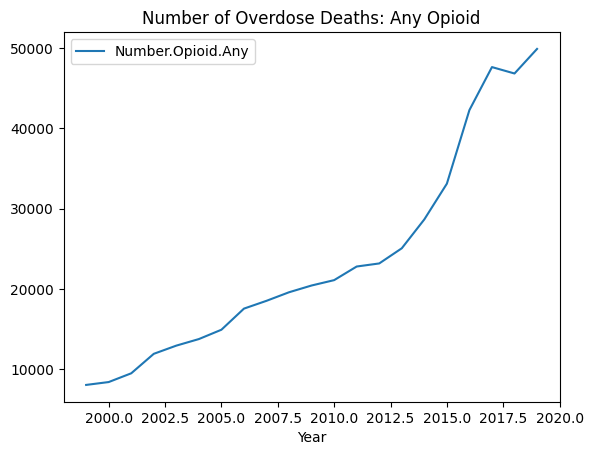

In [90]:
#make a dataframe with number of opioid any column.
drug_opioid_any=drug[['Year','Number.Opioid.Any']].copy()
drug_opioid_any.plot(x='Year', y='Number.Opioid.Any')
plt.title('Number of Overdose Deaths: Any Opioid')

Text(0.5, 1.0, 'Number of Overdose Deaths: Prescription')

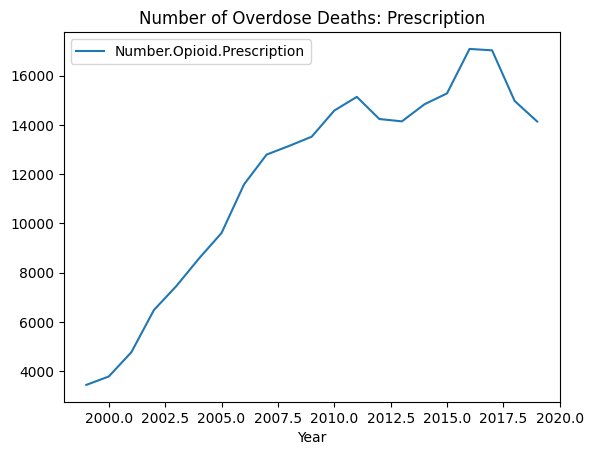

In [91]:
#make a dataframe with number of opioid prescription column.
drug_opioid_prescription=drug[['Year','Number.Opioid.Prescription']].copy()
drug_opioid_prescription.plot(x='Year', y='Number.Opioid.Prescription')
plt.title('Number of Overdose Deaths: Prescription')

Text(0.5, 1.0, 'Number of Overdose Deaths: Synthetic')

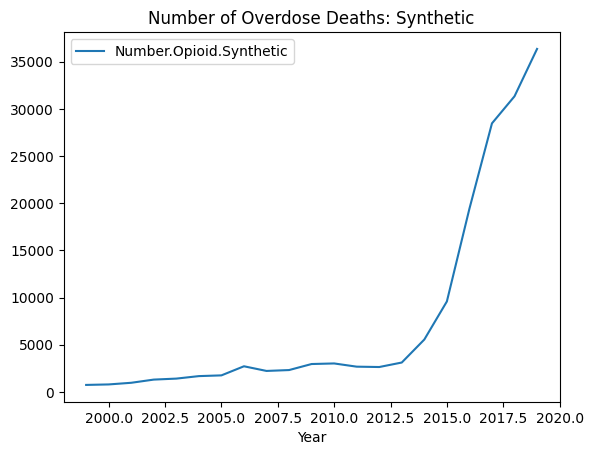

In [92]:
#make a dataframe with number of opioid synthetic column.
drug_opioid_synthetic=drug[['Year','Number.Opioid.Synthetic']].copy()
drug_opioid_synthetic.plot(x='Year', y='Number.Opioid.Synthetic')
plt.title('Number of Overdose Deaths: Synthetic')

Text(0.5, 1.0, 'Number of Overdose Deaths: Heroin')

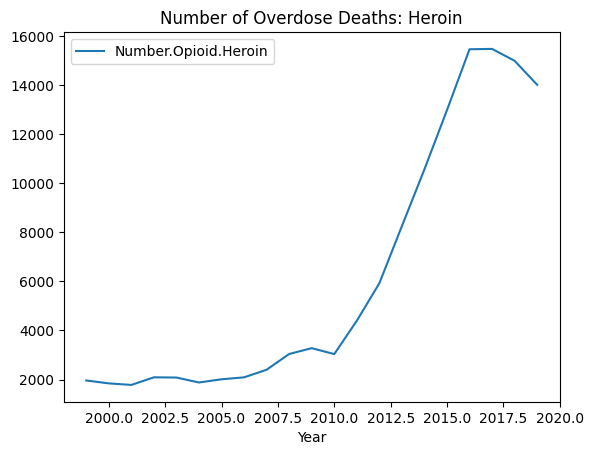

In [93]:
#make a dataframe with number of opioid heroin column.
drug_opioid_heroin=drug[['Year','Number.Opioid.Heroin']].copy()
drug_opioid_heroin.plot(x='Year', y='Number.Opioid.Heroin')
plt.title('Number of Overdose Deaths: Heroin')

Text(0.5, 1.0, 'Number of Overdose Deaths: Cocaine')

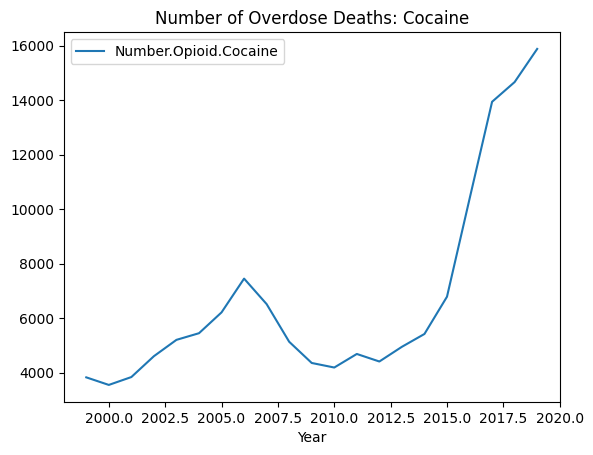

In [94]:
#make a dataframe with number of opioid cocaine column.
drug_opioid_cocaine=drug[['Year','Number.Opioid.Cocaine']].copy()
drug_opioid_cocaine.plot(x='Year', y='Number.Opioid.Cocaine')
plt.title('Number of Overdose Deaths: Cocaine')

## III. Results

Now that I spent enough time looking through the dataset, I began the main section of analysis to answer the research question. As my first step, I converted columns of dataframe into lists. As the x-axis of each graph is the year, I created a new list called 'year' from the 'year' column in drug dataset. Then, for each group of race and sex, I repeated converting dataframe into lists. Then I plotted multiple lines in each graph of sex and race to see the growth easily. 

Text(0.5, 1.0, 'Any Opioid Overdose Death Rate by Sex')

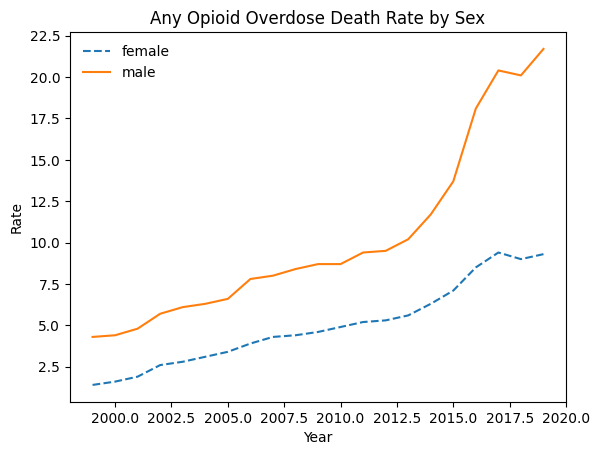

In [99]:
#convert the Rate.Opioid.Any.Sex.Female and Rate.Opioid.Any.Sex.Male columns to lists
year=drug['Year'].values.tolist()
rate_any_female=drug['Rate.Opioid.Any.Sex.Female'].values.tolist()
rate_any_male=drug['Rate.Opioid.Any.Sex.Male'].values.tolist()
plt.plot(year, rate_any_female, label='female', linestyle='--')
plt.plot(year, rate_any_male, label='male')
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Any Opioid Overdose Death Rate by Sex')

Text(0, 0.5, 'Rate')

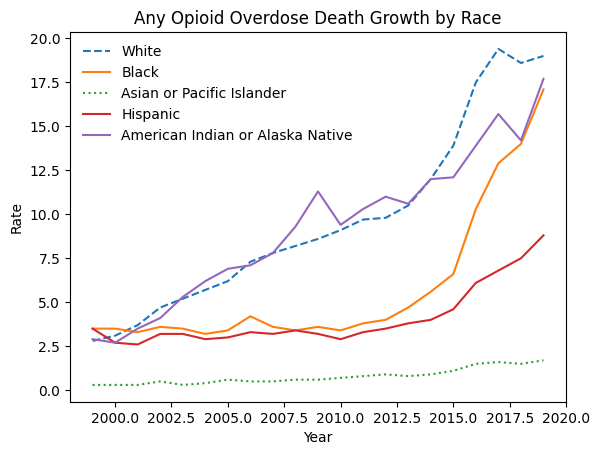

In [101]:
#convert the Rate.Opioid.Any columns for races to lists
rate_any_white=drug['Rate.Opioid.Any.Race.White'].values.tolist()
rate_any_black=drug['Rate.Opioid.Any.Race.Black'].values.tolist()
rate_any_asian=drug['Rate.Opioid.Any.Race.Asian or Pacific Islander'].values.tolist()
rate_any_hispanic=drug['Rate.Opioid.Any.Race.Hispanic'].values.tolist()
rate_any_indian=drug['Rate.Opioid.Any.Race.American Indian or Alaska Native'].values.tolist()

plt.plot(year,rate_any_white, label='White', linestyle='--')
plt.plot(year,rate_any_black, label='Black')
plt.plot(year,rate_any_asian, label='Asian or Pacific Islander', linestyle=':')
plt.plot(year,rate_any_hispanic, label='Hispanic')
plt.plot(year,rate_any_indian, label='American Indian or Alaska Native')

plt.legend(loc='upper left', frameon=False)
plt.title('Any Opioid Overdose Death Growth by Race')
plt.xlabel('Year')
plt.ylabel('Rate')

Now that I observed the overall picture of the all opioid overdose growth, I started to dig deeper into analyzing the overdose growth of a specific opioid drug based on sex and race. The process is somewhat different. First, I created a function that calculates the slope of line graph. The line is actually the line of best fit of the scatter plot of data points. Thus, I then converted the columns of dataframe into array. Next, I created scatter plots and drew a line of best fit. Lastly, I called the function with the info of the line and added the value to a new designated list. 

[0.135] [0.16999999999999998]


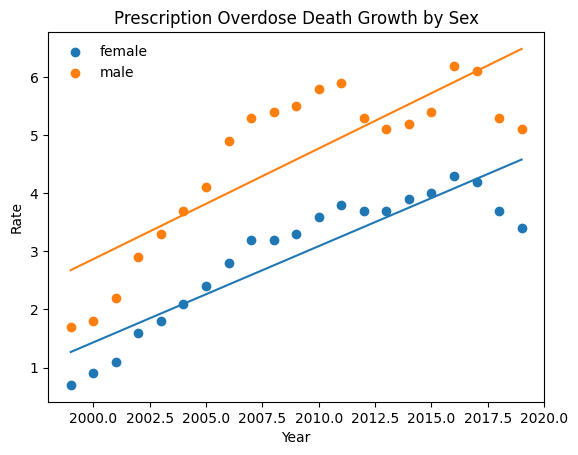

In [106]:
#function for calculating slope.
def slope(x1,y1,x2,y2):
    s = (y2-y1)/(x2-x1)
    return s

#convert the columns to array. 
year=np.array(year)
rate_presc_female=drug['Rate.Opioid.Prescription.Sex.Female'].to_numpy()
rate_presc_male=drug['Rate.Opioid.Prescription.Sex.Male'].to_numpy()

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Prescription Overdose Death Growth by Sex')

#find the line of best fit. 
a,b=np.polyfit(year,rate_presc_female,1)
c,d=np.polyfit(year,rate_presc_male,1)
plt.scatter(year,rate_presc_female, label='female')
plt.scatter(year,rate_presc_male, label='male')
plt.plot(year,a*year+b)
plt.plot(year,c*year+d)
plt.legend(loc='upper left', frameon=False)

#create an empty list for slope.
slope_prescription_female=[]
slope_prescription_male=[]

#calculate slope by calling the function.
slope_presc_female= slope(year[0], rate_presc_female[0],year[-1], rate_presc_female[-1])
slope_presc_male= slope(year[0], rate_presc_male[0],year[-1], rate_presc_male[-1])

#add the value to each list.
slope_prescription_female.append(slope_presc_female)
slope_prescription_male.append(slope_presc_male)

print(slope_prescription_female,slope_prescription_male)

In [ ]:
#Prescription Overdose Death Growth by Race

In [ ]:
#Synthetic Overdose Death Growth by Sex

In [ ]:
#Synthetic Overdose Death Growth by Race

In [ ]:
#Heroin Overdose Death Growth by Sex

In [ ]:
#Heroin Overdose Death Growth by Race

In [ ]:
#Cocaine Overdose Death Growth by Sex

In [ ]:
##Heroin Overdose Death Growth by Race

In [ ]:
#put all the slopes into 1 dataframe; 1 for each sex and race

In [ ]:
#discussion